# PXD018549
## Topoisomerase I Poisoning by Electrophiles Derived from Oxidative Stress
[PRIDE link](https://www.ebi.ac.uk/pride/archive/projects/PXD018549)

[Article link](https://linkinghub.elsevier.com/retrieve/pii/S2451945620304748)

In [2]:
#Import libraries
os.chdir("/home/robbe/ionbot/")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import numpy as np
import os
from pathlib import Path
from pyteomics import mass as pymass
import OxiAnalysis as OA
import importlib
importlib.reload(OA)

<module 'OxiAnalysis' from '/home/robbe/ionbot/OxiAnalysis.py'>

In [3]:
first = pd.read_csv("/home/robbe/ionbot/full_projects/PXD018549_first.csv")
del first["Unnamed: 0"]
del first["spectrum_title"]
del first["scan"]
first['modifications'] = first['modifications'].fillna("None")
first['Oxidant treatment'] = first['Oxidant treatment'].fillna("None")
first['Secondary treatment'] = first['Secondary treatment'].fillna("None")
first['Length of Secondary treatment (mins)'] = first['Length of Secondary treatment (mins)'].fillna(0)
first['Length of oxidant treatment (mins)'] = first['Length of oxidant treatment (mins)'].replace('0', 0)

/tmp/ipykernel_3994484/2480790391.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  first = pd.read_csv("/home/robbe/ionbot/full_projects/PXD018549_first.csv")


In [4]:
first.head()

,ionbot_match_id,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,modifications,modifications_delta,...,Organism,Cell line,Oxidant treatment,Oxidant dose (µM),Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting
0,0_8228_1,qe1_2019oct05_05_uc190822_dw35_1c,1044.54526,10465.4298,1435.58130,2,VIEGMEVVR,VIEGMEVVR,5|[35]oxidation[M],5|15.9949,...,Human,A549,None,0.0,None,0,0,0,NaN,First
1,0_8231_1,qe1_2019oct05_05_uc190822_dw35_1c,984.49975,9845.0284,1435.84356,2,AIYQATYR,AIYQATYR,None,0|,...,Human,A549,None,0.0,None,0,0,0,NaN,First
2,0_8232_3,qe1_2019oct05_05_uc190822_dw35_1c,992.52671,9925.2907,1435.93740,2,EFVISDRK,EFVISDRK,None,0|,...,Human,A549,None,0.0,None,0,0,0,NaN,First
3,0_8235_3,qe1_2019oct05_05_uc190822_dw35_1c,1847.92462,18479.2646,1436.20068,3,ITDSAGHIIYSKEDATK,ITDSAGHIIYSKEDATK,None,0|,...,Human,A549,None,0.0,None,0,0,0,NaN,First
4,0_8236_1,qe1_2019oct05_05_uc190822_dw35_1c,1464.66562,14646.6670,1436.27616,3,SYCAEIAHNVSSK,SYCAEIAHNVSSK,3|[4]carbamidomethyl[C],3|57.0215,...,Human,A549,None,0.0,None,0,0,0,NaN,First


In [5]:
print("The amount of PSMs in this project dataset is: ", first.shape[0])
print("The amount of raw files that make up the master dataset is: ", len(first["spectrum_file"].unique()))

The amount of PSMs in this project dataset is:  303227
The amount of raw files that make up the master dataset is:  19


In [6]:
first['Peptidoform_name'] = first.apply(lambda row: OA.peptidoform_name(row), axis=1)
first['Position'] = first['modifications'].apply(OA.get_positions)
first['Modification'] = first['modifications'].apply(OA.get_modification)
first['Oxidatively_modified'] = first['modifications'].apply(OA.oxidatively_modified)


In [7]:
first.head()

,ionbot_match_id,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,modifications,modifications_delta,...,Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting,Peptidoform_name,Position,Modification,Oxidatively_modified
0,0_8228_1,qe1_2019oct05_05_uc190822_dw35_1c,1044.54526,10465.4298,1435.58130,2,VIEGMEVVR,VIEGMEVVR,5|[35]oxidation[M],5|15.9949,...,None,0,0,0,NaN,First,VIEGM[35]oxidationEVVR,5,[35]oxidation[M],True
1,0_8231_1,qe1_2019oct05_05_uc190822_dw35_1c,984.49975,9845.0284,1435.84356,2,AIYQATYR,AIYQATYR,None,0|,...,None,0,0,0,NaN,First,AIYQATYR,None,None,False
2,0_8232_3,qe1_2019oct05_05_uc190822_dw35_1c,992.52671,9925.2907,1435.93740,2,EFVISDRK,EFVISDRK,None,0|,...,None,0,0,0,NaN,First,EFVISDRK,None,None,False
3,0_8235_3,qe1_2019oct05_05_uc190822_dw35_1c,1847.92462,18479.2646,1436.20068,3,ITDSAGHIIYSKEDATK,ITDSAGHIIYSKEDATK,None,0|,...,None,0,0,0,NaN,First,ITDSAGHIIYSKEDATK,None,None,False
4,0_8236_1,qe1_2019oct05_05_uc190822_dw35_1c,1464.66562,14646.6670,1436.27616,3,SYCAEIAHNVSSK,SYCAEIAHNVSSK,3|[4]carbamidomethyl[C],3|57.0215,...,None,0,0,0,NaN,First,SYC[4]carbamidomethylAEIAHNVSSK,3,[4]carbamidomethyl[C],False


## Overview of the treatments in this project

In [8]:
first.groupby(["Oxidant treatment", "Oxidant dose (µM)", "Length of oxidant treatment (mins)", "Secondary treatment", "Secondary treatment dose (µM)", 'Length of Secondary treatment (mins)',"Notes"], dropna=False)["ionbot_match_id"].count().to_frame().reset_index()

,Oxidant treatment,Oxidant dose (µM),Length of oxidant treatment (mins),Secondary treatment,Secondary treatment dose (µM),Length of Secondary treatment (mins),Notes,ionbot_match_id
0,CPT,0.1,4320,None,0,0,NaN,104781
1,None,0.0,0,None,0,0,Top1 was incubated with 200 µM HNE,1954
2,None,0.0,0,None,0,0,NaN,98004
3,TPT,0.1,4320,None,0,0,NaN,98488


### Conditions that will be compared
| Treatment 1 | Treatment 2 |
| ----------- | ----------- |
| CPT| Control |
| TPT | Control |
| CPT | TPT |

There is also a special setting where Top1 was incubated with 200 µM HNE, we'll see later what to do with it

In [9]:
from cmath import nan
CPT = first.loc[lambda first: first["Oxidant treatment"] == "CPT"]
TPT = first.loc[lambda first: first["Oxidant treatment"] == "TPT"]
Control = first.loc[lambda first: (first["Oxidant treatment"] == "None") & (first["Notes"] != "Top1 was incubated with 200 µM HNE")]
Special = first.loc[lambda first: (first["Notes"] == "Top1 was incubated with 200 µM HNE")]

## Comparison between the treatments
### 1) CPT vs Control

In [10]:
print("There are this many replicates of each treatment: {}".format(CPT["spectrum_file"].nunique()))

There are this many replicates of each treatment: 6


In [11]:
CPTrep = OA.replicate_filter(CPT, 6)
Controlrep = OA.replicate_filter(Control, 6)

In [12]:
print("The ratio of PSMs that contain an oxidative modification in the CPT treatment subset: {}".format((CPTrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the Control treatment subset: {}".format((Controlrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))

The ratio of PSMs that contain an oxidative modification in the CPT treatment subset: 10.21541568495456 %
The ratio of PSMs that contain an oxidative modification in the Control treatment subset: 10.464935468822889 %


In [13]:
mrCPTrep = OA.modratios(CPTrep)
mrControlrep = OA.modratios(Controlrep)

In [14]:
modr = pd.merge(mrCPTrep,mrControlrep, on="Modification", suffixes=('_CPT', '_Control'))
modr["Difference"] = modr["Ratios_CPT"] - modr["Ratios_Control"]
modr = modr.drop(modr[(modr["Ratios_CPT"] == 0) & (modr["Ratios_Control"] == 0)].index)
modr

,Modification,Ratios_CPT,Ratios_Control,Difference
0,[35]Oxidation[T],0.000438,0.000000,0.000438
5,[35]Oxidation[I],0.000438,0.000000,0.000438
7,[35]Oxidation[G],0.000000,0.000435,-0.000435
16,[35]Oxidation[P],0.004141,0.005198,-0.001057
17,[35]Oxidation[N],0.000219,0.000000,0.000219
33,[345]Trioxidation[C],0.000000,0.001739,-0.001739
129,[35]oxidation[M],0.113160,0.123808,-0.010648


/home/robbe/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


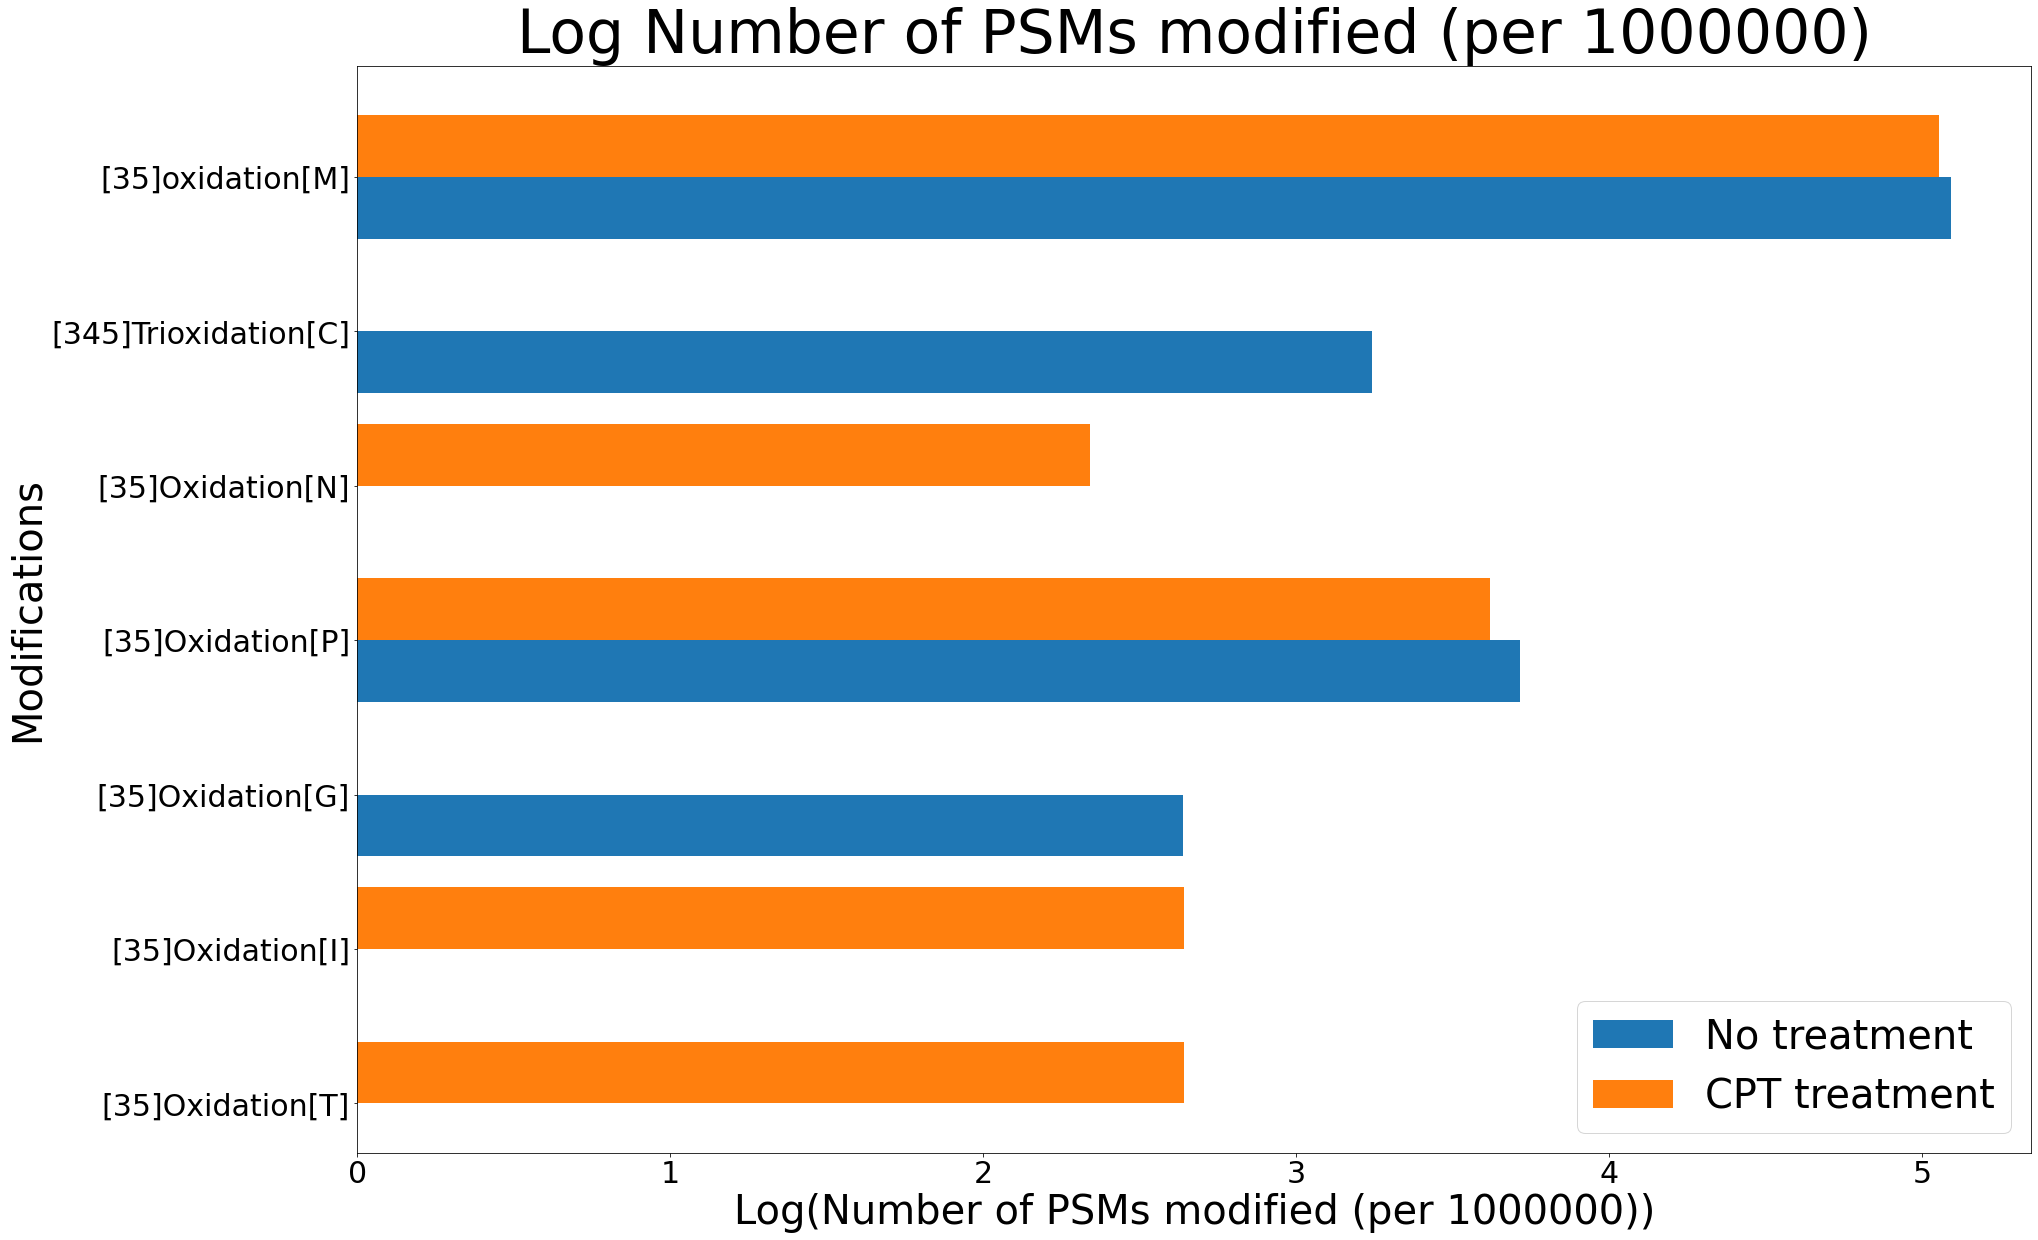

In [15]:
y = modr["Modification"]
xnone = np.log10(modr['Ratios_Control']*1000000)
xH = np.log10(modr['Ratios_CPT']*1000000)
y_axis = np.arange(len(y))
plt.figure(figsize=(30,20))
plt.barh(y_axis - 0.2, xnone, 0.4, label = 'No treatment')
plt.barh(y_axis + 0.2, xH, 0.4, label = 'CPT treatment')

plt.yticks(y_axis, y)
plt.ylabel("Modifications", fontsize = 40)
plt.xlabel("Log(Number of PSMs modified (per 1000000))", fontsize = 40)
plt.title("Log Number of PSMs modified (per 1000000)", fontsize = 60)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(fontsize = 40)
plt.show()

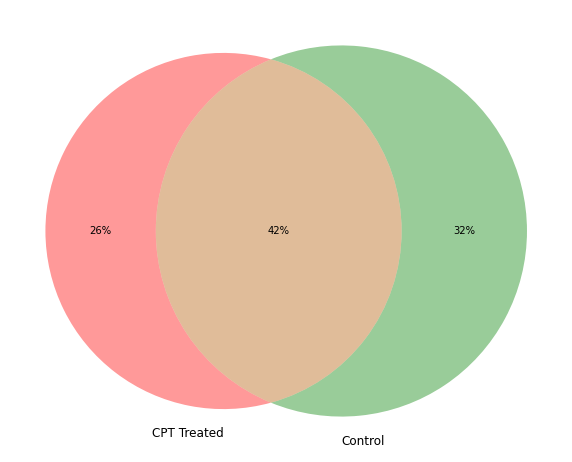

In [16]:
OA.condition_venn([CPTrep, Controlrep], ["CPT Treated", "Control"])

In [17]:
difflist, pf_only_treatment = OA.comparelist(CPTrep,Controlrep)
pf_only_treatment.head()

,ionbot_match_id,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,modifications,modifications_delta,...,Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting,Peptidoform_name,Position,Modification,Oxidatively_modified
50500,0_8401_1,qe1_2019oct05_09_uc190822_dw35_2c,1098.56736,10985.6690,1442.53158,2,GTVEPQIEAR,GTVEPQIEAR,None,0|,...,None,0,4320,0,NaN,First,GTVEPQIEAR,None,None,False
50515,0_8416_1,qe1_2019oct05_09_uc190822_dw35_2c,1347.65232,13476.5175,1444.17300,2,VVTDTDETEIAR,VVTDTDETEIAR,None,0|,...,None,0,4320,0,NaN,First,VVTDTDETEIAR,None,None,False
50520,0_8425_1,qe1_2019oct05_09_uc190822_dw35_2c,1072.55124,10445.5635,1445.28702,2,ISSPATINSR,ISSPATINSR,3|[122]Formyl[S],3|27.9949,...,None,0,4320,0,NaN,First,ISS[122]FormylPATINSR,3,[122]Formyl[S],False
50551,0_8470_1,qe1_2019oct05_09_uc190822_dw35_2c,1347.65244,13476.5175,1449.87948,2,VVTDTDETEIAR,VVTDTDETEIAR,None,0|,...,None,0,4320,0,NaN,First,VVTDTDETEIAR,None,None,False
50858,0_9017_1,qe1_2019oct05_09_uc190822_dw35_2c,1044.50950,10435.0358,1507.30086,2,YGAATFTSAR,YGAATFTSAR,None,0|,...,None,0,4320,0,NaN,First,YGAATFTSAR,None,None,False


In [18]:
onlytreatment = OA.modcounts(pf_only_treatment)
onlytreatment = onlytreatment.sort_values("Counts", ascending = False).drop(onlytreatment[onlytreatment["Counts"] == 0].index, axis=0)
onlytreatment

,Modification,Counts
129,[35]oxidation[M],263
5,[35]Oxidation[I],2
0,[35]Oxidation[T],2
17,[35]Oxidation[N],1


In [19]:
RPMCPT = OA.relative_PSM_modification(CPTrep)
RPMControl = OA.relative_PSM_modification(Controlrep)

In [20]:
RPM = pd.merge(RPMCPT,RPMControl, on="Amino acid", suffixes=('_CPT', '_Control'))
RPM

,Amino acid,Relative level of PSMs containing unmodified residue_CPT,Relative level of PSMs containing unmodified residue_Control
0,A,1.000000,1.000000
1,R,1.000000,1.000000
2,N,0.981769,0.967420
3,D,1.000000,1.000000
4,C,0.000000,0.000000
5,Q,0.993281,0.992340
6,E,0.996810,0.995557
7,G,1.000000,1.000000
8,H,0.889503,0.895911
9,I,1.000000,1.000000


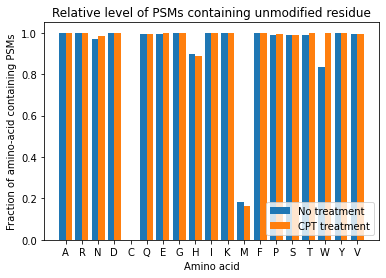

In [21]:
x = RPM["Amino acid"]
xnone = RPM["Relative level of PSMs containing unmodified residue_Control"]
xH = RPM['Relative level of PSMs containing unmodified residue_CPT']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, xnone, 0.4, label = 'No treatment')
plt.bar(x_axis + 0.2, xH, 0.4, label = 'CPT treatment')

plt.xticks(x_axis, x)
plt.xlabel("Amino acid")
plt.ylabel("Fraction of amino-acid containing PSMs")
plt.title("Relative level of PSMs containing unmodified residue")
plt.rcParams["figure.figsize"] = (20,20)
plt.legend(loc="lower right")
plt.show()

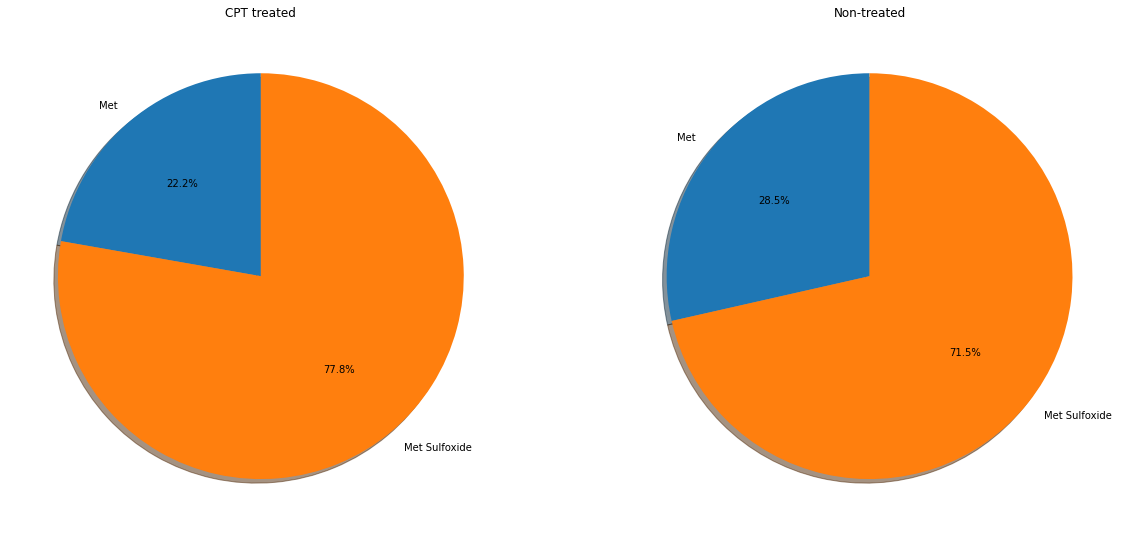

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2)
OA.methionine_overview(CPTrep, ax1)
OA.methionine_overview(Controlrep, ax2)
plt.title("Methionine containing peptides")
ax1.set_title("CPT treated")
ax2.set_title("Non-treated")
plt.show()

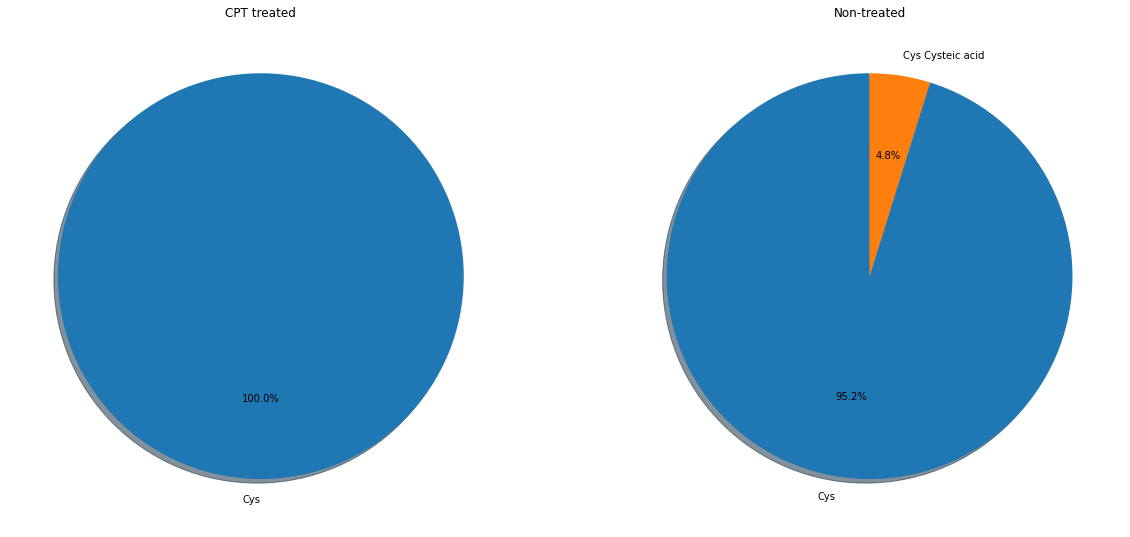

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2)
OA.cysteine_overview(CPTrep, ax1)
OA.cysteine_overview(Controlrep, ax2)
plt.title("cysteine containing peptides")
ax1.set_title("CPT treated")
ax2.set_title("Non-treated")
plt.show()

## 2) TPT vs Control

In [24]:
print("There are this many replicates of TPT treatment: {}".format(TPT["spectrum_file"].nunique()))

There are this many replicates of TPT treatment: 6


In [25]:
TPTrep = OA.replicate_filter(TPT, 6)

In [26]:
print("The ratio of PSMs that contain an oxidative modification in the TPT treatment subset: {}".format((TPTrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the Control treatment subset: {}".format((Controlrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))

The ratio of PSMs that contain an oxidative modification in the TPT treatment subset: 9.440958357102112 %
The ratio of PSMs that contain an oxidative modification in the Control treatment subset: 10.464935468822889 %


In [27]:
mrTPTrep = OA.modratios(TPTrep)

In [28]:
modr2 = pd.merge(mrTPTrep,mrControlrep, on="Modification", suffixes=('_TPT', '_Control'))
modr2["Difference"] = modr2["Ratios_TPT"] - modr2["Ratios_Control"]
modr2 = modr2.drop(modr2[(modr2["Ratios_TPT"] == 0) & (modr2["Ratios_Control"] == 0)].index)
modr2

,Modification,Ratios_TPT,Ratios_Control,Difference
7,[35]Oxidation[G],0.000191,0.000435,-0.000244
11,[35]Oxidation[V],0.000191,0.000000,0.000191
16,[35]Oxidation[P],0.005317,0.005198,0.000119
33,[345]Trioxidation[C],0.000000,0.001739,-0.001739
129,[35]oxidation[M],0.107970,0.123808,-0.015838


/home/robbe/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


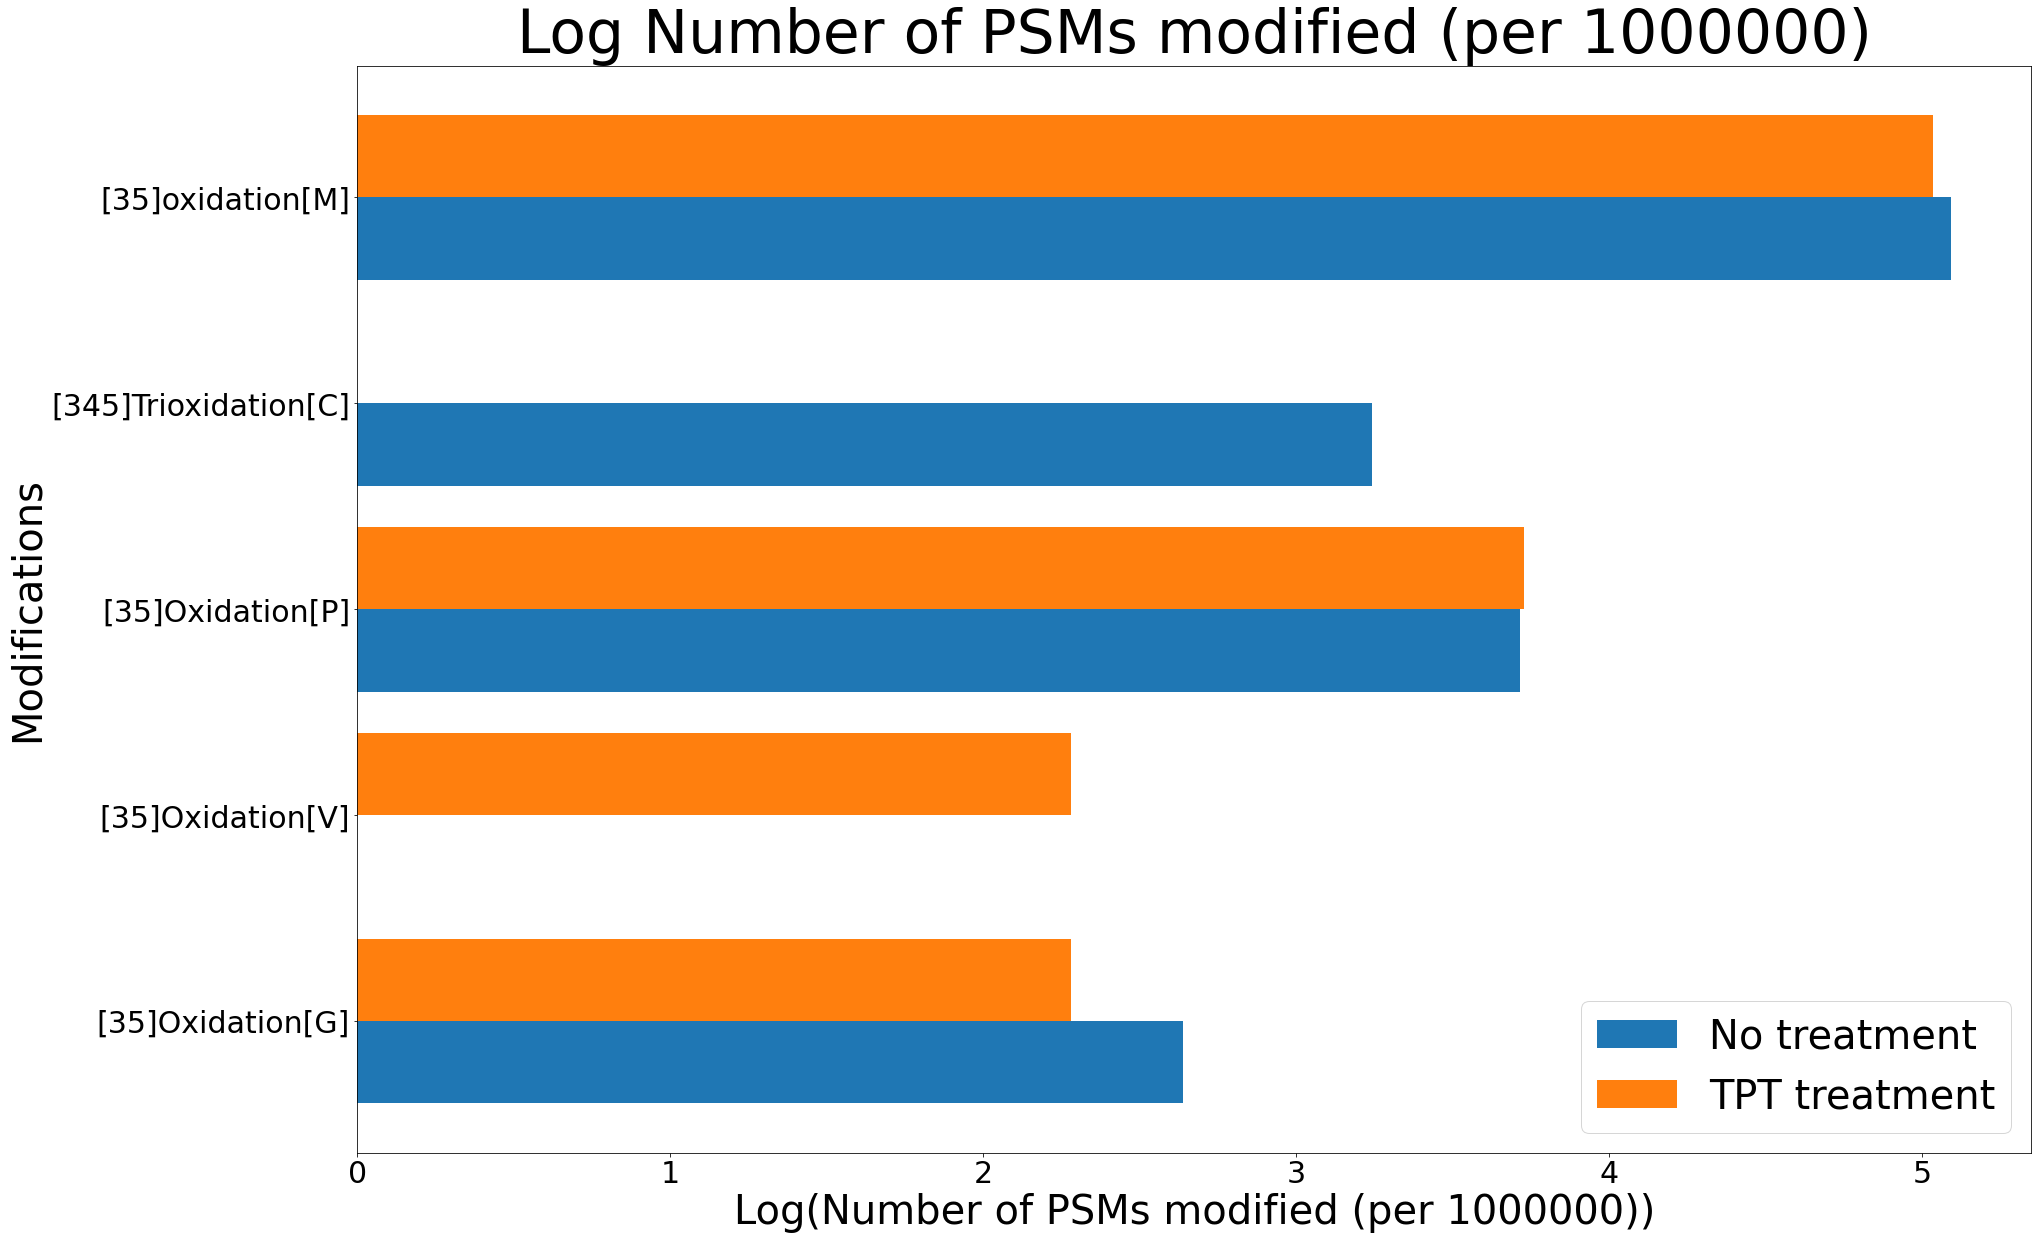

In [29]:
y = modr2["Modification"]
xnone = np.log10(modr2['Ratios_Control']*1000000)
xH = np.log10(modr2['Ratios_TPT']*1000000)
y_axis = np.arange(len(y))
plt.figure(figsize=(30,20))
plt.barh(y_axis - 0.2, xnone, 0.4, label = 'No treatment')
plt.barh(y_axis + 0.2, xH, 0.4, label = 'TPT treatment')

plt.yticks(y_axis, y)
plt.ylabel("Modifications", fontsize = 40)
plt.xlabel("Log(Number of PSMs modified (per 1000000))", fontsize = 40)
plt.title("Log Number of PSMs modified (per 1000000)", fontsize = 60)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(fontsize = 40)
plt.show()

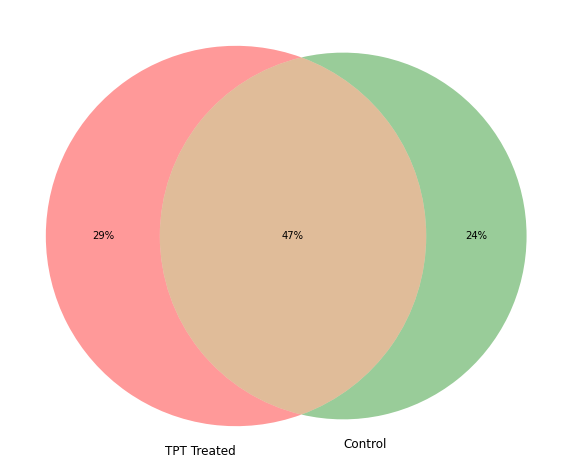

In [30]:
OA.condition_venn([TPTrep, Controlrep], ["TPT Treated", "Control"])

In [31]:
difflist2, pf_only_treatment2 = OA.comparelist(TPTrep,Controlrep)
pf_only_treatment2.head()

,ionbot_match_id,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,modifications,modifications_delta,...,Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting,Peptidoform_name,Position,Modification,Oxidatively_modified
102967,0_8369_1,qe1_2019oct05_13_uc190822_dw35_3c,1347.64951,13476.5175,1449.88212,2,VVTDTDETEIAR,VVTDTDETEIAR,None,0|,...,None,0,4320,0,NaN,First,VVTDTDETEIAR,None,None,False
102996,0_8416_1,qe1_2019oct05_13_uc190822_dw35_3c,1072.55149,10445.5635,1455.14226,2,ISSPATINSR,ISSPATINSR,6|[122]Formyl[T],6|27.9949,...,None,0,4320,0,NaN,First,ISSPAT[122]FormylINSR,6,[122]Formyl[T],False
102997,0_8418_1,qe1_2019oct05_13_uc190822_dw35_3c,1347.65244,13476.5175,1455.33012,2,VVTDTDETEIAR,VVTDTDETEIAR,None,0|,...,None,0,4320,0,NaN,First,VVTDTDETEIAR,None,None,False
103020,0_8476_2,qe1_2019oct05_13_uc190822_dw35_3c,1072.55100,10445.5635,1461.53838,2,ISSPATINSR,ISSPATINSR,6|[122]Formyl[T],6|27.9949,...,None,0,4320,0,NaN,First,ISSPAT[122]FormylINSR,6,[122]Formyl[T],False
103061,0_8564_1,qe1_2019oct05_13_uc190822_dw35_3c,1118.59043,11165.7747,1470.60072,2,VTVVDVNESR,VTVVDVNESR,None,0|,...,None,0,4320,0,NaN,First,VTVVDVNESR,None,None,False


In [32]:
onlytreatment2 = OA.modcounts(pf_only_treatment2)
onlytreatment2 = onlytreatment2.sort_values("Counts", ascending=False).drop(onlytreatment2[onlytreatment2["Counts"] == 0].index, axis=0)
onlytreatment2

,Modification,Counts
129,[35]oxidation[M],313


In [33]:
RPMTPT = OA.relative_PSM_modification(TPTrep)

In [34]:
RPM2 = pd.merge(RPMTPT,RPMControl, on="Amino acid", suffixes=('_TPT', '_Control'))
RPM2

,Amino acid,Relative level of PSMs containing unmodified residue_TPT,Relative level of PSMs containing unmodified residue_Control
0,A,1.000000,1.000000
1,R,1.000000,1.000000
2,N,0.975524,0.967420
3,D,0.996875,1.000000
4,C,0.000000,0.000000
5,Q,0.990802,0.992340
6,E,1.000000,0.995557
7,G,1.000000,1.000000
8,H,0.927909,0.895911
9,I,1.000000,1.000000


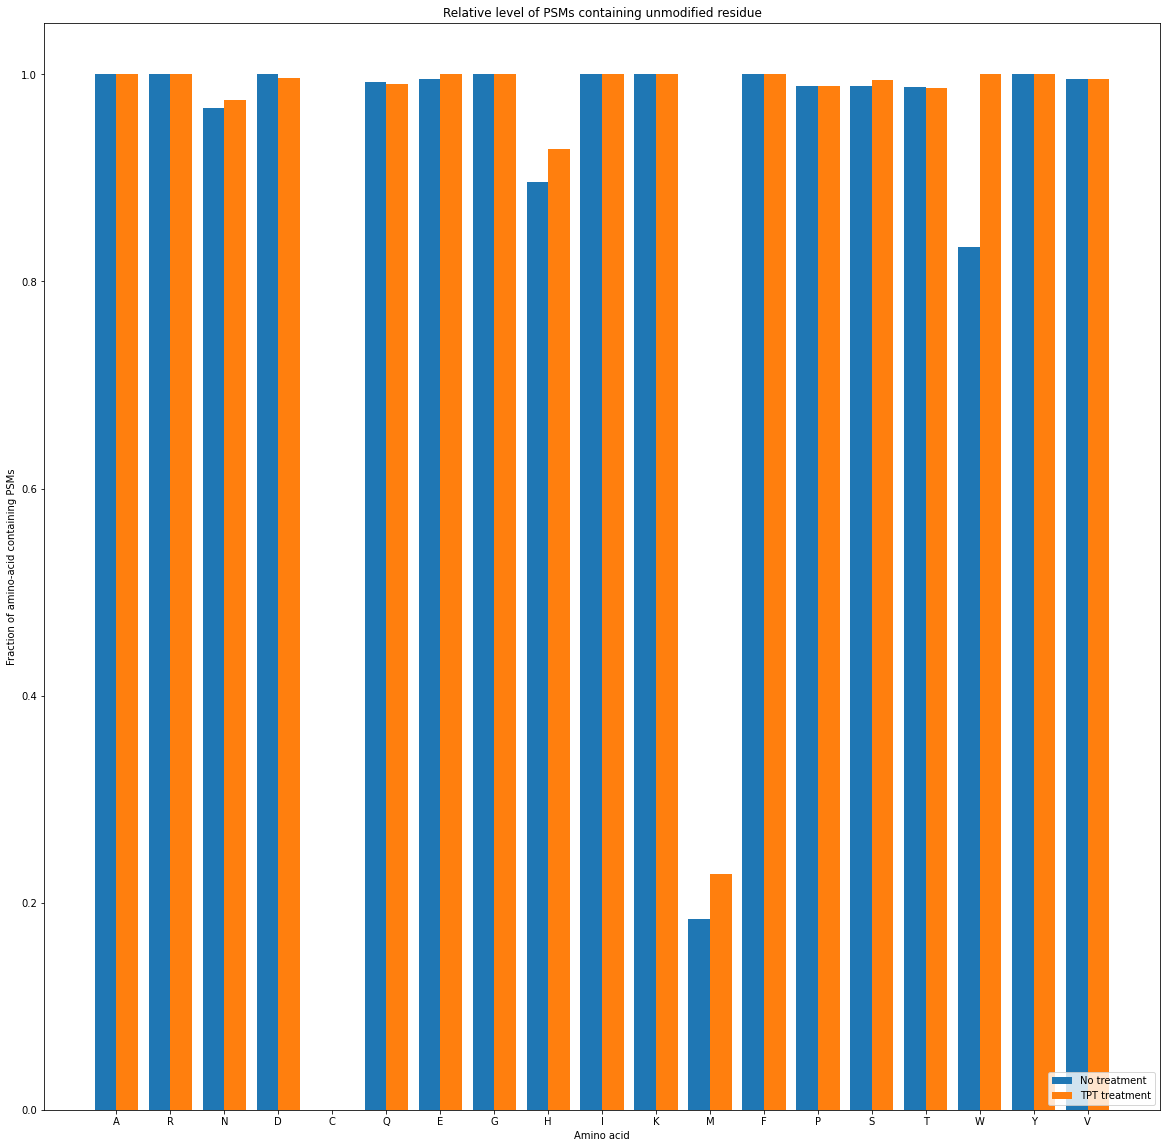

In [35]:
x = RPM2["Amino acid"]
xnone = RPM2["Relative level of PSMs containing unmodified residue_Control"]
xH = RPM2['Relative level of PSMs containing unmodified residue_TPT']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, xnone, 0.4, label = 'No treatment')
plt.bar(x_axis + 0.2, xH, 0.4, label = 'TPT treatment')

plt.xticks(x_axis, x)
plt.xlabel("Amino acid")
plt.ylabel("Fraction of amino-acid containing PSMs")
plt.title("Relative level of PSMs containing unmodified residue")
plt.rcParams["figure.figsize"] = (20,20)
plt.legend(loc="lower right")
plt.show()

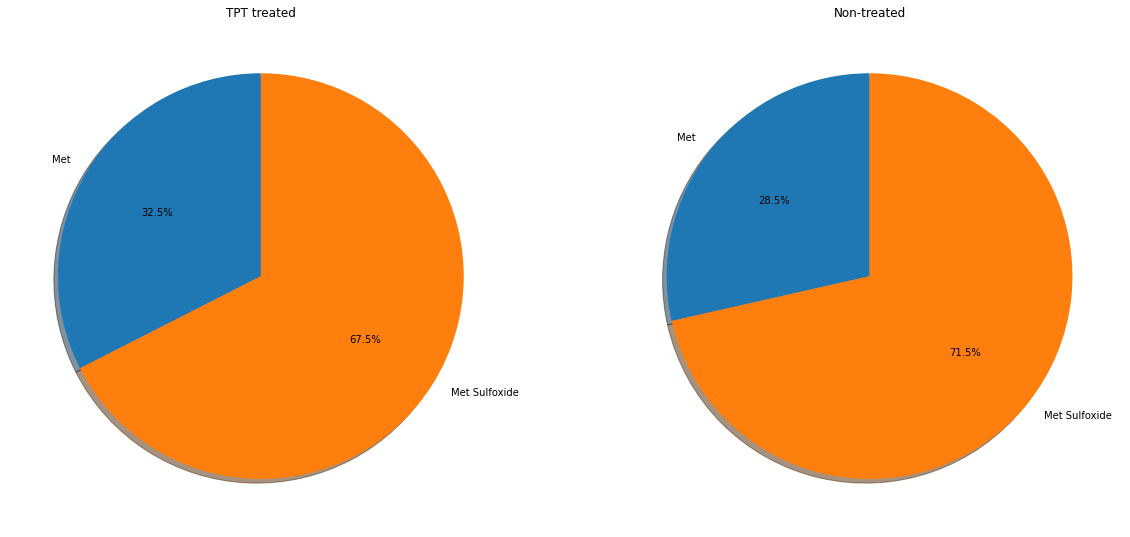

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2)
OA.methionine_overview(TPTrep, ax1)
OA.methionine_overview(Controlrep, ax2)
plt.title("Methionine containing peptides")
ax1.set_title("TPT treated")
ax2.set_title("Non-treated")
plt.show()

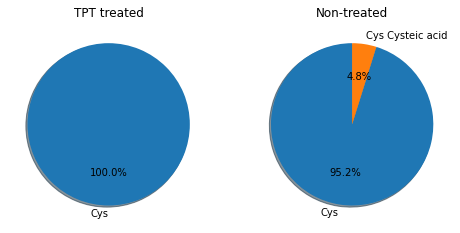

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2)
OA.cysteine_overview(TPTrep, ax1)
OA.cysteine_overview(Controlrep, ax2)
plt.title("cysteine containing peptides")
ax1.set_title("TPT treated")
ax2.set_title("Non-treated")
plt.show()

## 3) CPT vs TPT

In [37]:
print("The ratio of PSMs that contain an oxidative modification in the CPT treatment subset: {}".format((CPTrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the TPT treatment subset: {}".format((TPTrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))

The ratio of PSMs that contain an oxidative modification in the CPT treatment subset: 10.21541568495456 %
The ratio of PSMs that contain an oxidative modification in the TPT treatment subset: 9.440958357102112 %


In [38]:
modr3 = pd.merge(mrCPTrep,mrTPTrep, on="Modification", suffixes=('_CPT', '_TPT'))
modr3["Difference"] = modr3["Ratios_CPT"] - modr3["Ratios_TPT"]
modr3 = modr3.drop(modr3[(modr3["Ratios_CPT"] == 0) & (modr3["Ratios_TPT"] == 0)].index)
modr3

,Modification,Ratios_CPT,Ratios_TPT,Difference
0,[35]Oxidation[T],0.000438,0.000000,0.000438
5,[35]Oxidation[I],0.000438,0.000000,0.000438
7,[35]Oxidation[G],0.000000,0.000191,-0.000191
11,[35]Oxidation[V],0.000000,0.000191,-0.000191
16,[35]Oxidation[P],0.004141,0.005317,-0.001176
17,[35]Oxidation[N],0.000219,0.000000,0.000219
129,[35]oxidation[M],0.113160,0.107970,0.005190


/home/robbe/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


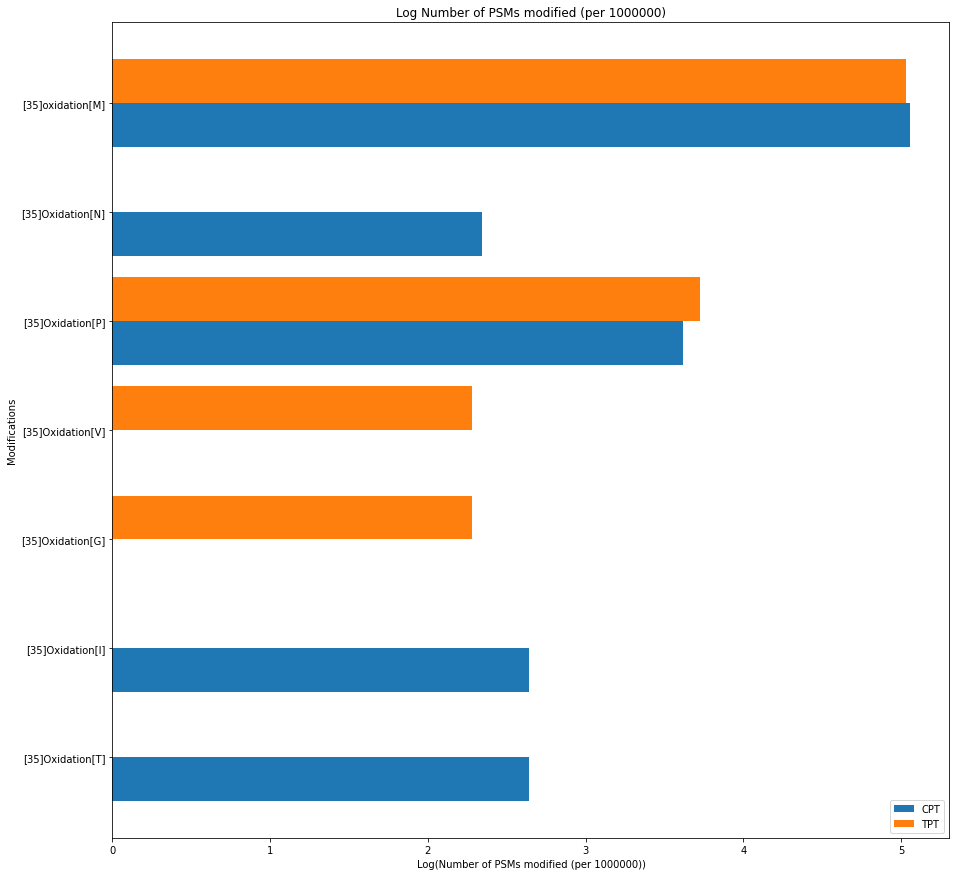

In [39]:
y = modr3["Modification"]
xnone = np.log10(modr3['Ratios_CPT']*1000000)
xH = np.log10(modr3['Ratios_TPT']*1000000)
y_axis = np.arange(len(y))

plt.figure(figsize=(15,15))
plt.barh(y_axis - 0.2, xnone, 0.4, label = 'CPT')
plt.barh(y_axis + 0.2, xH, 0.4, label = 'TPT')

plt.yticks(y_axis, y)
plt.ylabel("Modifications")
plt.xlabel("Log(Number of PSMs modified (per 1000000))")
plt.title("Log Number of PSMs modified (per 1000000)")

plt.legend()
plt.show()

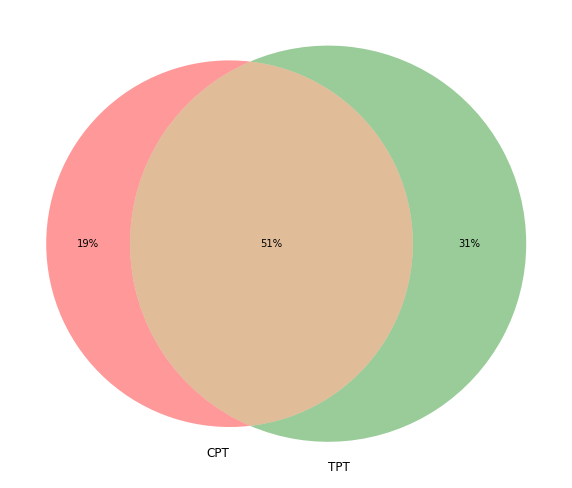

In [40]:
OA.condition_venn([CPTrep, TPTrep], ['CPT', 'TPT'])

In [41]:
difflist3, pf_only_treatment3 = OA.comparelist(CPTrep, TPTrep)
pf_only_treatment3.head()

,ionbot_match_id,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,modifications,modifications_delta,...,Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting,Peptidoform_name,Position,Modification,Oxidatively_modified
50500,0_8401_1,qe1_2019oct05_09_uc190822_dw35_2c,1098.56736,10985.6690,1442.53158,2,GTVEPQIEAR,GTVEPQIEAR,None,0|,...,None,0,4320,0,NaN,First,GTVEPQIEAR,None,None,False
50520,0_8425_1,qe1_2019oct05_09_uc190822_dw35_2c,1072.55124,10445.5635,1445.28702,2,ISSPATINSR,ISSPATINSR,3|[122]Formyl[S],3|27.9949,...,None,0,4320,0,NaN,First,ISS[122]FormylPATINSR,3,[122]Formyl[S],False
50676,0_8704_4,qe1_2019oct05_09_uc190822_dw35_2c,1192.63882,11926.3729,1474.41486,3,SVETIKEMIK,SVETIKEMIK,8|[35]oxidation[M],8|15.9949,...,None,0,4320,0,NaN,First,SVETIKEM[35]oxidationIK,8,[35]oxidation[M],True
50689,0_8734_1,qe1_2019oct05_09_uc190822_dw35_2c,1192.57493,11926.3729,1477.77114,2,SVETIKEMIK,SVETIKEMIK,8|[35]oxidation[M],8|15.9949,...,None,0,4320,0,NaN,First,SVETIKEM[35]oxidationIK,8,[35]oxidation[M],True
50972,0_9223_2,qe1_2019oct05_09_uc190822_dw35_2c,1055.51435,10555.1884,1528.73604,2,AHAWPSPYK,AHAWPSPYK,None,0|,...,None,0,4320,0,NaN,First,AHAWPSPYK,None,None,False


In [42]:
onlytreatment3 = OA.modcounts(pf_only_treatment3)
onlytreatment3 = onlytreatment3.sort_values("Counts", ascending=False).drop(onlytreatment3[onlytreatment3["Counts"] == 0].index, axis=0)
onlytreatment3

,Modification,Counts
129,[35]oxidation[M],239
5,[35]Oxidation[I],2
0,[35]Oxidation[T],2
17,[35]Oxidation[N],1


In [43]:
RPM3 = pd.merge(RPMCPT,RPMTPT, on="Amino acid", suffixes=('_CPT', '_TPT'))
RPM3

,Amino acid,Relative level of PSMs containing unmodified residue_CPT,Relative level of PSMs containing unmodified residue_TPT
0,A,1.000000,1.000000
1,R,1.000000,1.000000
2,N,0.981769,0.975524
3,D,1.000000,0.996875
4,C,0.000000,0.000000
5,Q,0.993281,0.990802
6,E,0.996810,1.000000
7,G,1.000000,1.000000
8,H,0.889503,0.927909
9,I,1.000000,1.000000


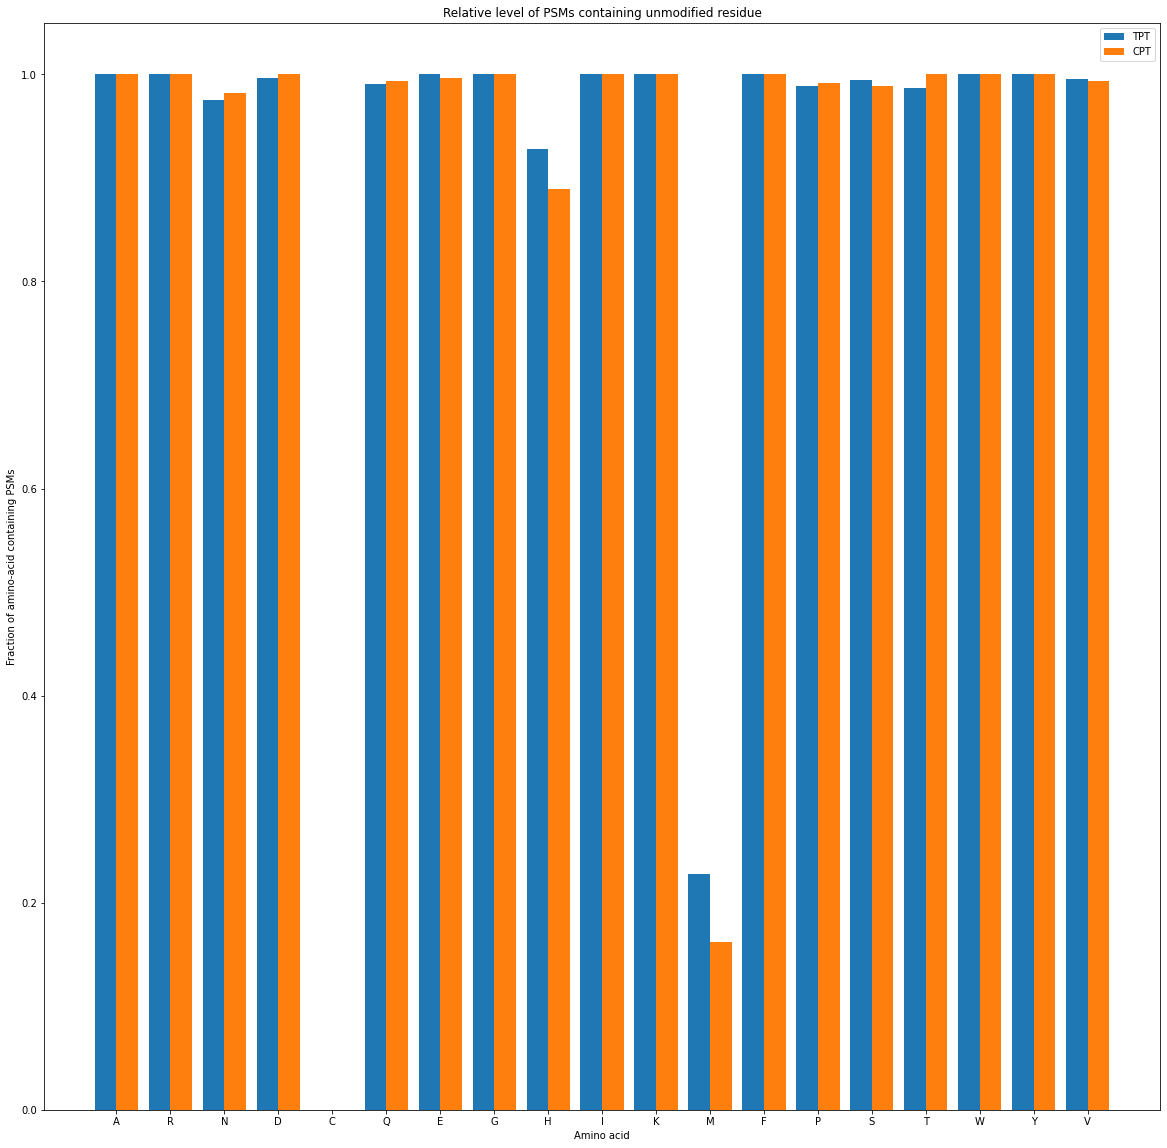

In [44]:
x = RPM3["Amino acid"]
xnone = RPM3["Relative level of PSMs containing unmodified residue_TPT"]
xH = RPM3['Relative level of PSMs containing unmodified residue_CPT']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, xnone, 0.4, label = 'TPT')
plt.bar(x_axis + 0.2, xH, 0.4, label = 'CPT')

plt.xticks(x_axis, x)
plt.xlabel("Amino acid")
plt.ylabel("Fraction of amino-acid containing PSMs")
plt.title("Relative level of PSMs containing unmodified residue")
plt.rcParams["figure.figsize"] = (8,8)
plt.legend()
plt.show()

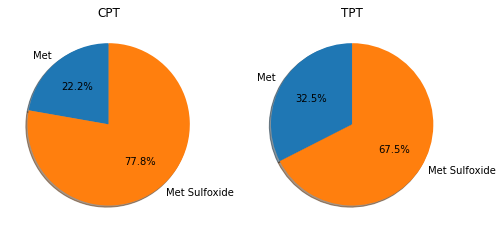

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2)
OA.methionine_overview(CPTrep, ax1)
OA.methionine_overview(TPTrep, ax2)
plt.title("Methionine containing peptides")
ax1.set_title("CPT")
ax2.set_title("TPT")
plt.rcParams['font.size'] = 10
plt.show()

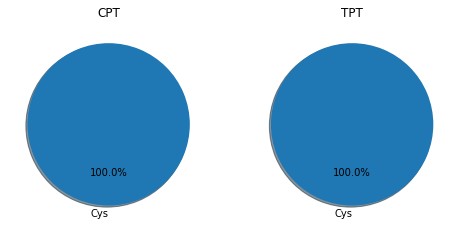

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2)
OA.cysteine_overview(CPTrep, ax1)
OA.cysteine_overview(TPTrep, ax2)
plt.title("cysteine containing peptides")
ax1.set_title("CPT")
ax2.set_title("TPT")
plt.rcParams['font.size'] = 10
plt.show()

## All three conditions

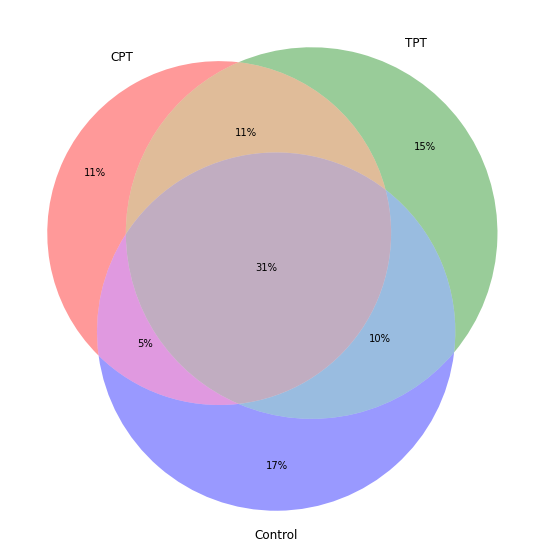

In [46]:
OA.condition_venn([CPTrep, TPTrep, Controlrep], ['CPT', 'TPT', 'Control'])